In [22]:
import json
import pandas as pd
from os import listdir
from os.path import isfile, join

loading: const_vacuum_l298n_sfm3000_100_5000.json
loading: const_vacuum_l298n_sfm3000_10_5000.json
loading: const_vacuum_l298n_sfm3000_110_5000.json
loading: const_vacuum_l298n_sfm3000_120_5000.json
loading: const_vacuum_l298n_sfm3000_20_5000.json
loading: const_vacuum_l298n_sfm3000_30_5000.json
loading: const_vacuum_l298n_sfm3000_40_5000.json
loading: const_vacuum_l298n_sfm3000_50_5000.json
loading: const_vacuum_l298n_sfm3000_60_5000.json
loading: const_vacuum_l298n_sfm3000_70_5000.json
loading: const_vacuum_l298n_sfm3000_80_5000.json
loading: const_vacuum_l298n_sfm3000_90_5000.json


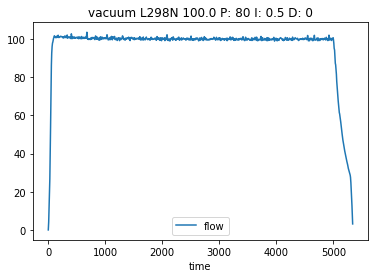

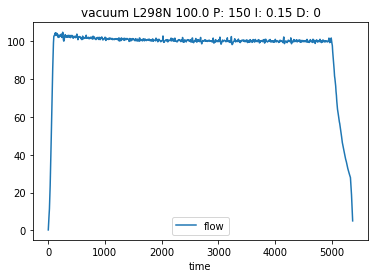

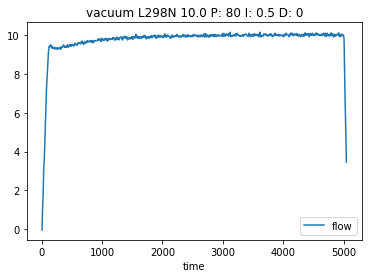

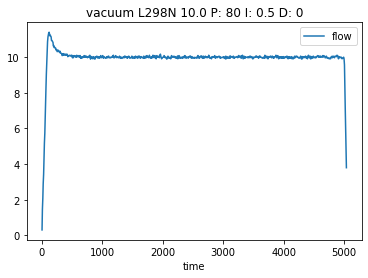

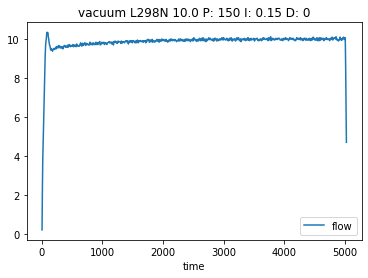

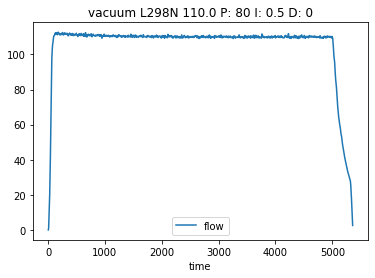

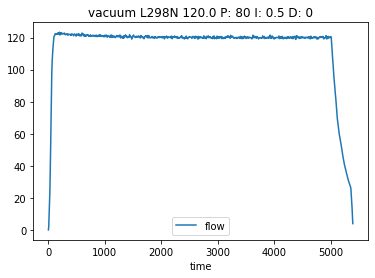

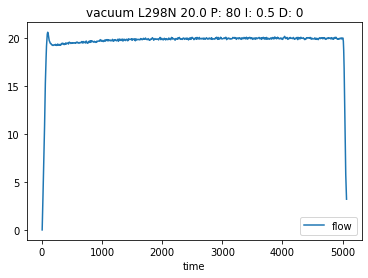

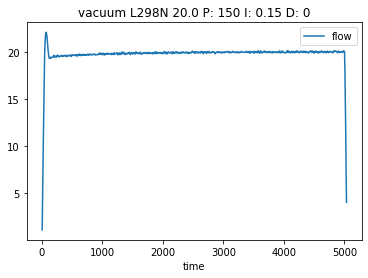

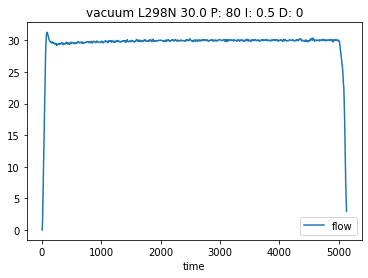

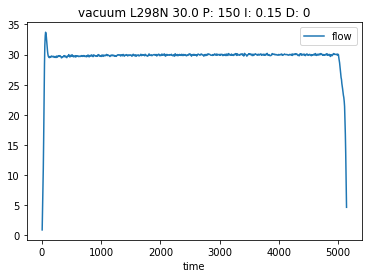

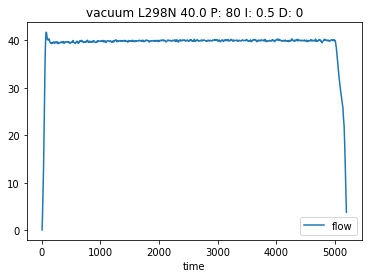

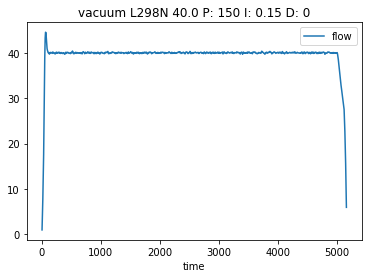

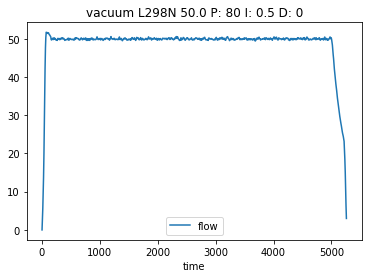

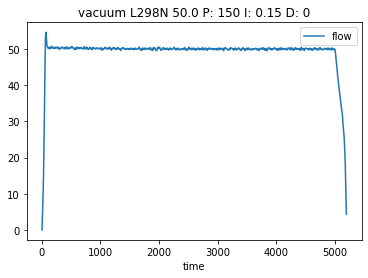

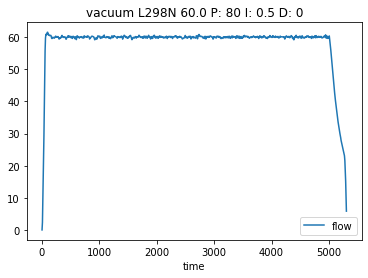

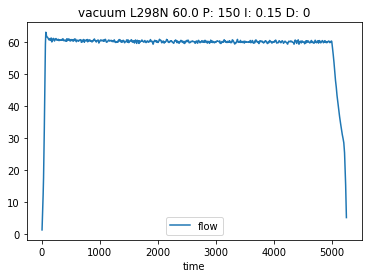

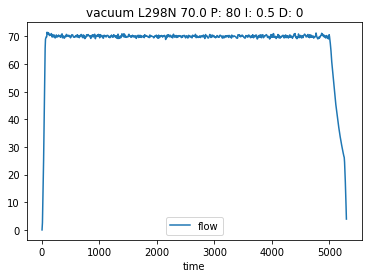

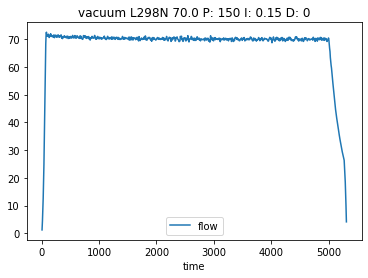

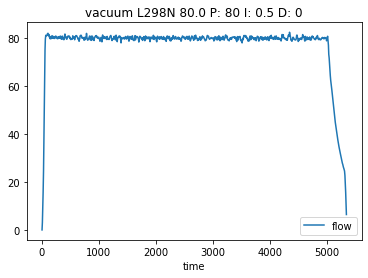

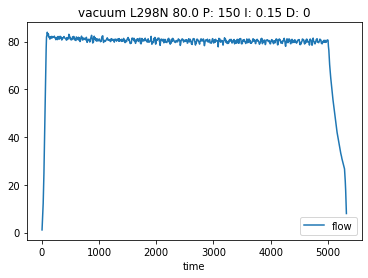

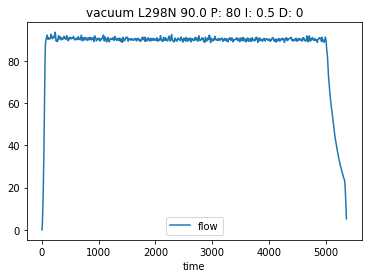

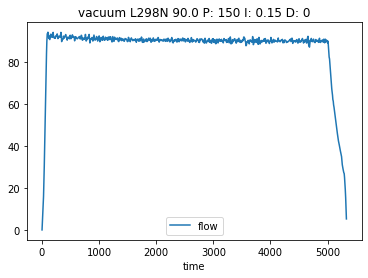

In [73]:
files = [f for f in listdir('measurements') if isfile(join('measurements', f))]
files.sort()

data = []
for fn in files:
    if 'const_vacuum_l298n_sfm' in fn:
        with open(f'measurements/{fn}', 'r') as f:
            print(f'loading: {fn}')
            str_data = f.read()
            measurements = str_data.split('\n')
            for m in measurements[0:-1]:
                data.append(json.loads(m))
            #data.append(json.load(f))
        
dfs = []
for m in data:
    dfs.append((m['metadata'], pd.DataFrame.from_dict({ 'time': m['time'], 'flow': m['flow']})))

for m, df in dfs:
    fan = m.get('fan')
    mc = m.get('mc')
    sp = m.get('setpoint')
    if sp == None:
        sp = m.get('peak')
    p = m.get('kP')
    i = m.get('kI')
    d = m.get('kD')
    name = f'{fan} {mc} {sp} P: {p} I: {i} D: {d}'
    df.plot(title=name, x='time',y='flow')